In [11]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import patsy as ps
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col
pd.options.display.max_columns = 50

## Ejemplo 8.1 Ecuación del logaritmo del salario con errores estándar robustos a la heteroscedasticidad) (wage1.dta)

Estimamos el modelo del Ejemplo 7.6, pero damos los errores estándar robustos a la heteroscedasticidad junto con los errores estándar de MCO habituales. Algunas estimaciones se presentan con más dígitos para que sea posible comparar los errores estándar habituales con los errores estándar robustos a la heteroscedasticidad:

In [12]:
df = pd.read_stata('WAGE1.dta')
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,south,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,0,1,0,0,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.667707,49,4


In [29]:
df.keys()

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'smsa', 'northcen', 'south', 'west', 'construc', 'ndurman',
       'trcommpu', 'trade', 'services', 'profserv', 'profocc', 'clerocc',
       'servocc', 'lwage', 'expersq', 'tenursq', 'marrmale', 'marrfem',
       'singfem'],
      dtype='object')

In [3]:
df.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


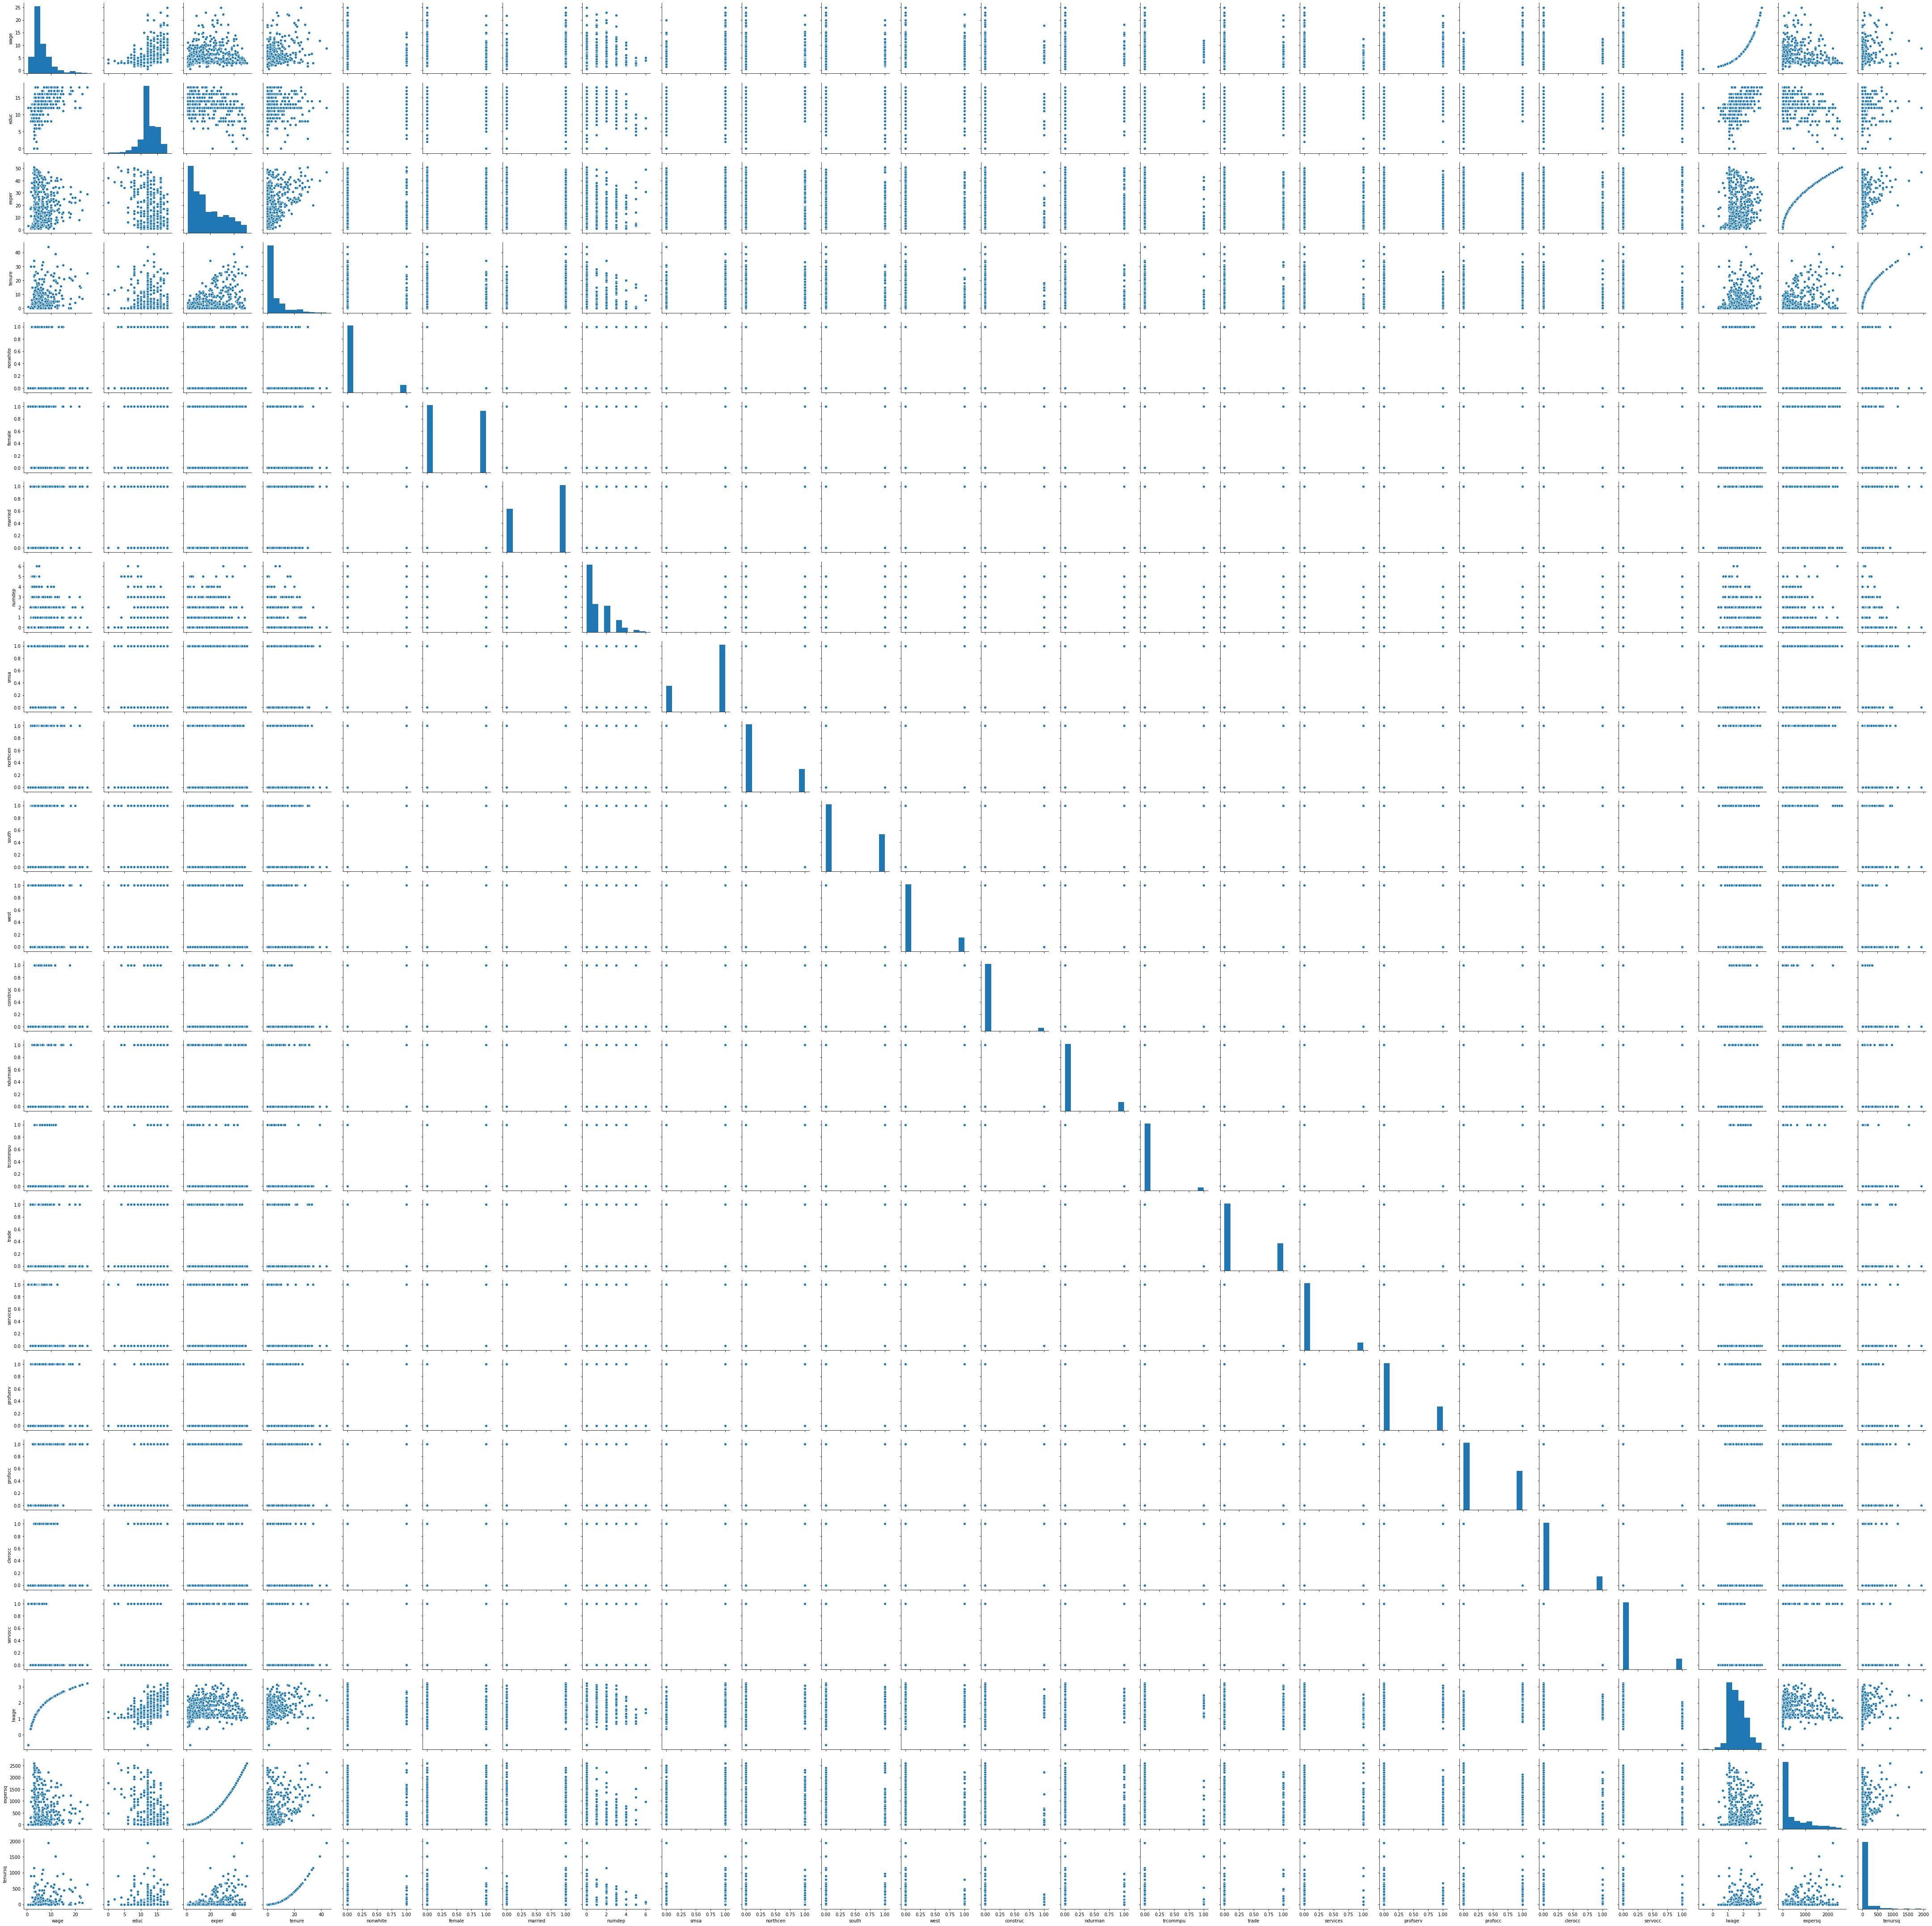

In [4]:
sns.pairplot(df)

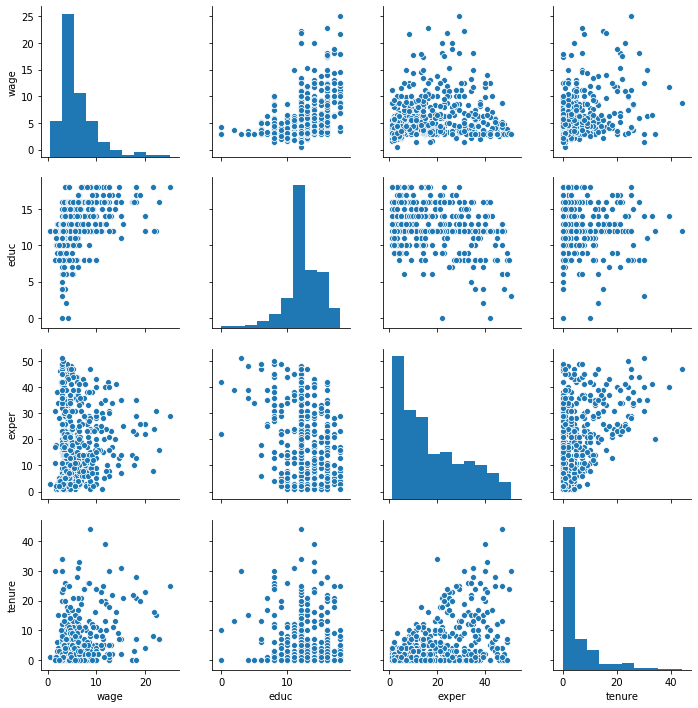

In [5]:
sns.pairplot(df[['wage', 'educ', 'exper',  'tenure']].dropna(how = 'any', axis = 0))

In [6]:
df[['wage', 'educ', 'exper',  'tenure']].corr(method='pearson')

,wage,educ,exper,tenure
wage,1.000000,0.405903,0.112903,0.346890
educ,0.405903,1.000000,-0.299542,-0.056173
exper,0.112903,-0.299542,1.000000,0.499291
tenure,0.346890,-0.056173,0.499291,1.000000


In [13]:
df['marrmale']=(1-df['female']) *df['married']
df['marrfem']=df['female'] *df['married']
df['singfem']=df['female'] *(1-df['married'])


In [8]:
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,marrmale,marrfem,singfem
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,1.131402,4,0,0,0,1
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,0,1,1.175573,484,4,0,1,0
2,3.00,11,2,0,0,0,0,2,0,0,...,0,0,0,0,1.098612,4,0,0,0,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,1,0,1.791759,1936,784,1,0,0
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,1.667707,49,4,1,0,0


In [ ]:
# np.log(wage) np.power(exper,2) np.power(tenure,2)

In [14]:
model1 = smf.ols('lwage ~ marrmale + marrfem + singfem + educ + exper + expersq + tenure + tenursq ',data=df).fit()

In [5]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           1.28e-64
Time:                        12:34:42   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3214      0.100      3.213      0.0

In [15]:
y,X = ps.dmatrices('lwage ~ marrmale + marrfem + singfem + educ + exper + expersq + tenure + tenursq',data=df, return_type='dataframe')
model = sm.OLS(y,X) # Describe Model
results = model.fit() # Fit model
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.28e-64
Time:                        17:19:30   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3214      0.100      3.213      0.0

In [6]:
# Model 2
y,X = ps.dmatrices('lwage ~ marrmale + marrfem + singfem + educ + exper + expersq + tenure + tenursq',data=df, return_type='dataframe')
model = sm.OLS(y,X) # Describe Model
results = model.fit(cov_type='HC0') 
print (results.summary())


                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     52.60
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           3.82e-62
Time:                        12:35:14   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3214      0.109      2.961      0.0

In [17]:
# Podemos poner HC0 , HC1, HC2, HC3
results2_robust = results.get_robustcov_results('HC1')

In [18]:
print(results2_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     51.70
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           2.72e-61
Time:                        11:08:35   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3214      0.109      2.936      0.0

In [ ]:
# Impresión de los dos nodelos

In [17]:
print(summary_col([model1, results],stars=True,float_format='%0.9f',
                  model_names=['Hetroskedastic\n(b/se)','Robust\n(b/se)'],
                 info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.3f}".format(x.rsquared)}))


                Hetroskedastic      Robust    
                    (b/se)          (b/se)    
----------------------------------------------
Intercept      0.321378082***  0.321378082*** 
               (0.100008992)   (0.108528425)  
marrmale       0.212675680***  0.212675680*** 
               (0.055357178)   (0.056650949)  
marrfem        -0.198267604*** -0.198267604***
               (0.057835462)   (0.058265055)  
singfem        -0.110350212**  -0.110350212*  
               (0.055742053)   (0.056625515)  
educ           0.078910283***  0.078910283*** 
               (0.006694498)   (0.007350960)  
exper          0.026800569***  0.026800569*** 
               (0.005242847)   (0.005094966)  
expersq        -0.000535245*** -0.000535245***
               (0.000110426)   (0.000105426)  
tenure         0.029087521***  0.029087521*** 
               (0.006762003)   (0.006881282)  
tenursq        -0.000533142**  -0.000533142** 
               (0.000231243)   (0.000241591)  
R-squared   

Los errores estándar MCO habituales están entre paréntesis, ( ), debajo de la estimación MCO correspondiente, y los errores estándar robustos a la heteroscedasticidad están entre corchetes, []. Los números entre corchetes constituyen el único elemento nuevo, ya que la ecuación se sigue estimando por MCO.

Se observan varias cosas en la Ecuación (8.6). En primer lugar, en esta aplicación concreta, cualquier variable que era estadísticamente significativa usando el estadístico t habitual es todavía significativa usando el estadístico t robusto a la heteroscedasticidad.

Esto es porque los dos conjuntos de errores estándar no son muy diferentes. (Los p-valores asociados diferirán ligeramente porque los estadísticos t robustos no son idénticos a los estadísticos t no robustos habituales.) El cambio relativo más grande en los errores estándar se da para el coeficiente de educ: el error estándar habitual es 0.0067, y el robusto es 0.0074. Aun así, el error estándar robusto implica un estadístico t robusto por encima de 10.

La Ecuación (8.6) también muestra que los errores estándar robustos pueden Ser tanto mayores como menores que los errores estándar habituales. Por ejemplo, el error estándar robusto de exper es 0.0051, mientras que el error estándar habitual es 0.0055. 

No sabemos por anticipado cuál será más grande. En la práctica, los errores estándar robustos son frecuentemente mayores que los habituales.

Antes de abandonar este ejemplo, debemos destacar que no sabemos, en este punto del análisis, s i hay o no hay heteroscedasticidad en el modelo poblacional de la Ecuación (8.6). Todo lo que hemos hecho es presentar, junto con los errores estándar habituales, aquellos que son válidos (asintóticamente), haya o no heteroscedasticidad.  Podemos ver que ninguna conclusión importante se trastoca por usar los errores estándar robustos en este caso. Esto ocurre con frecuencia en el trabajo aplicado, pero en otros casos, las diferencias entre los errores estándar habituales y los robustos son mucho mayores. Para un ejemplo en el que las diferencias son sustanciales, véase el Ejercicio C8.2

Al llegar a este punto, el lector tal vez se pregunte lo siguiente: si los errores estandar robustos a la heterocedasticidad son validos mas a menudo que los errores estandar usuales de MCO, .por que molestarse en calcular los errores estandar usuales? Esta es una pregunta razonable.

Una razon por la que se utilizan los errores estandar usuales en el trabajo con cortes transversales es que, si el supuesto de homocedasticidad se satisface y los errores estan distribuidos normalmente, los estadisticos t usuales tiene distribuciones t exactas, sin importar el tamano de muestra (vea el capitulo 4). Los errores estandar robustos y los estadisticos t robustos se justifican solo si el tamano de muestra se hace grande. 

Con tamaños de muestra pequenos, el estadistico t robusto puede tener distribuciones que no esten muy proximas a la distribucion t y que podrian echar a perder la inferencia.
Cuando se trata de muestras grandes, se justifica que en las aplicaciones con cortes transversales se reporten solo los errores estandar robustos a la heterocedasticidad, y esto es lo que, en la practica, se hace cada vez mas. 

Es tambien usual dar ambos errores estandar, como en la ecuacion (8.6), de modo que el lector pueda determinar si algunas conclusiones son sensibles al error estandar empleado

donde $\hat r_{ij}^{2}$ denota el i-ésimo residual de regresar $x_{j}$ sobre el resto de las variables independientes, y $SRC_{j}$ es la suma de residuales cuadrados de esta regresión (vea la sección 3.2 para la representación de descuento de efectos parciales de los estimadores de MCO). 

La raíz cuadrada de la cantidad en (8.4) se conoce como error estándar de $\hat \beta_{j}$ robusto a la heterocedasticidad

HC0_se   White's (1980) heteroskedasticity robust standard errors.

HC1_se   MacKinnon and White's (1985) heteroskedasticity robust standard errors.

HC2_se   MacKinnon and White's (1985) heteroskedasticity robust standard errors.

HC3_se   MacKinnon and White's (1985) heteroskedasticity robust standard errors.

In [16]:
model1.params[1]

0.21267568043186635

In [10]:
results.params[1]

0.21267568043186635

In [12]:
modelA = smf.ols('marrmale ~ marrfem + singfem + educ + exper + expersq + tenure + tenursq ',data=df).fit()

In [ ]:
modelA.resid
model1.resid
modelA.ssr

In [13]:
VBMM = (((modelA.resid**2)*(model1.resid**2)).sum())/(modelA.ssr**2)


In [14]:
VBMM

0.0032093300628714947

In [15]:
np.sqrt(VBMM)

0.05665094935543

In [ ]:
Tesy White

In [18]:
model1.model.exog

array([[  1.,   0.,   0., ...,   4.,   0.,   0.],
       [  1.,   0.,   1., ..., 484.,   2.,   4.],
       [  1.,   0.,   0., ...,   4.,   0.,   0.],
       ...,
       [  1.,   1.,   0., ..., 169.,  18., 324.],
       [  1.,   1.,   0., ...,  25.,   1.,   1.],
       [  1.,   0.,   0., ...,  25.,   4.,  16.]])

In [20]:
sm.stats.diagnostic.het_white(model1.resid, model1.model.exog)

(45.687266730396196,
 0.12926458735971144,
 1.2920443912935815,
 0.12367437193037008)

## Ejemplo 8.2 Estadístico F robusto a la heteroscedasticidad (gpa3.dta)

Tambien pueden obtenerse estadisticos F y ML robustos a una heterocedasticidad de forma desconocida y arbitraria. El estadístico F robusto a la heterocedasticidad (o una transformación simple del mismo) se conoce tambien como estadistico de Wald robusto a la heterocedasticidad.

El uso de estadisticos robustos a la heterocedasticidad para restricciones de exclusión multiple es rutinario en los soft.


Con los datos del primer semestre (spring)de GPA3.wf1, estimamos la siguiente ecuación:

Primero dejamos el sample para spring es decir term = 2

In [4]:
#dfe2 = pd.read_csv('GPA3.raw',delim_whitespace=True,header=None)
#dfe2.columns=['term','sat','tothrs','cumgpa','season','frstsem','crsgpa','verbmath','trmgpa','hssize','hsrank','id','spring','female','black','white','ctrmgpa','ctothrs','ccrsgpa','ccrspop','cseason','hsperc','football'] 

dfe2 = pd.read_stata('gpa3.dta')

In [9]:
dfe2.head()

,term,sat,tothrs,cumgpa,season,frstsem,crsgpa,verbmath,trmgpa,hssize,hsrank,id,spring,female,black,white,ctrmgpa,ctothrs,ccrsgpa,ccrspop,cseason,hsperc,football
0,1,920,31,2.25,0,0,2.6464,0.48387,1.50,10,4,22.0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,40.000000,0
1,2,920,43,2.04,1,0,2.5077,0.48387,2.25,10,4,22.0,1,1,0,0,0.75,12.0,-0.1387,-62.25,1.0,40.000000,0
2,1,780,28,2.03,0,0,2.8679,0.81395,2.20,123,102,35.0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,82.926826,0
3,2,780,43,2.09,1,0,2.8839,0.81395,1.60,123,102,35.0,1,0,0,1,-0.60,15.0,0.0160,-73.25,1.0,82.926826,0
4,1,810,0,0.00,0,1,2.7634,0.88372,1.60,119,42,36.0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,35.294117,0


In [5]:
# if Spring   que es lo mismo que term = 2
dfSpring=dfe2[dfe2['spring']==1]

In [7]:
# Model 1
y,X = ps.dmatrices('cumgpa ~ sat + hsperc + tothrs + female + black + white',data=dfSpring, return_type='dataframe')
modele2 = sm.OLS(y,X) # Describe Model
resultse2 = modele2.fit() # Fit model
print (resultse2.summary())

                            OLS Regression Results                            
Dep. Variable:                 cumgpa   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     39.98
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           3.41e-37
Time:                        10:41:04   Log-Likelihood:                -238.90
No. Observations:                 366   AIC:                             491.8
Df Residuals:                     359   BIC:                             519.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.230      6.397      0.0

In [26]:
# Model 2
y,X = ps.dmatrices('cumgpa ~ sat + hsperc + tothrs + female + black + white',data=dfSpring, return_type='dataframe')
modele22 = sm.OLS(y,X) # Describe Model
resultse22 = modele22.fit(cov_type='HC0') 
print (resultse22.summary())
hypotheses = '(black = 0),(white=0)'
f_test = resultse22.f_test(hypotheses)    
print (f_test)

                            OLS Regression Results                            
Dep. Variable:                 cumgpa   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     40.06
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           2.95e-37
Time:                        11:51:56   Log-Likelihood:                -238.90
No. Observations:                 366   AIC:                             491.8
Df Residuals:                     359   BIC:                             519.1
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.219      6.726      0.0

De nuevo, las diferencias entre los errores estándar habituales y los robustos a la heteroscedasticidad no son muy grandes, y el uso de estadísticos t robustos no cambia la significatividad estadística de ninguna variable independiente. Los test de significatividad individual tampoco se ven muy afectados. Supongamos que queremos contrastar la hipótesis nula de que, después de haber tomado en cuenta los demás factores, no hay diferencias en cumgpa por motivos de raza. Esto se plantea como H0:   Bblack = 0 , Bwhite = 0. 

El estadístico F habitual se obtiene fácilmente una vez que tenemos el R-cuadrado del modelo restringido, que es de 0.3983. El estadístico F es entonces $[(0.4006 - 0.3983)/(1 - 0.4006)](359/2)$ = 0.69. 

In [6]:
modelRes = smf.ols('cumgpa ~ sat + hsperc + tothrs + female ',data=dfSpring).fit()
print(modelRes.summary())

                            OLS Regression Results                            
Dep. Variable:                 cumgpa   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     59.74
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.10e-38
Time:                        10:40:20   Log-Likelihood:                -239.59
No. Observations:                 366   AIC:                             489.2
Df Residuals:                     361   BIC:                             508.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3285      0.180      7.388      0.0

In [10]:
F = ((resultse2.rsquared - modelRes.rsquared)/(1-resultse2.rsquared))*(359/2)
F

0.6796041956073616

In [25]:
hypotheses = '(black = 0),(white=0)'
f_test = resultse2.f_test(hypotheses)    
print (f_test) 

<F test: F=array([[0.6796042]]), p=0.5074683622584155, df_denom=359, df_num=2>


podemos hacer el test de Wald , en la ecuación sin la opción de robustez a heterocedasticidad

O bien hacemos la regresión restringida, es decir, sin black y White

De allí es donde tomamos el F que es 0,398291 y usamos el de la ecuación no restringida sin la opción de robustez a heterocedasticidad, que es F = 0,400560 y es la cuenta que tenemos arriba



Si hay heteroscedasticidad, esta versión del test no es válida. La versión robusta a la heteroscedasticidad no tiene una forma simple, pero algunos paquetes estadísticos permiten calcularlo. Lo hacemos en el ejemplo siguiente.

El valor del estadístico F robusto a la heteroscedasticidad es de 0.75 lo que difiere ligeramente de la versión no robusta. El p-valor para el test robusto es de 0.474,lo que no está cerca de los niveles de significatividad estándar. No logramos rechazar la hipótesis nula mediante el uso de ninguno de los contrastes


In [27]:
print(summary_col([resultse2, resultse22],stars=True,float_format='%0.3f',
                  model_names=['Hetroskedastic\n(b/se)','Robust\n(b/se)'],
                 info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.3f}".format(x.rsquared)}))


          Hetroskedastic   Robust 
              (b/se)       (b/se) 
----------------------------------
Intercept 1.470***       1.470*** 
          (0.230)        (0.219)  
sat       0.001***       0.001*** 
          (0.000)        (0.000)  
hsperc    -0.009***      -0.009***
          (0.001)        (0.001)  
tothrs    0.003***       0.003*** 
          (0.001)        (0.001)  
female    0.303***       0.303*** 
          (0.059)        (0.059)  
black     -0.128         -0.128   
          (0.147)        (0.118)  
white     -0.059         -0.059   
          (0.141)        (0.110)  
N         366            366      
R2        0.401          0.401    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [11]:
model = smf.ols('cumgpa ~ sat + hsperc + tothrs + female + black + white',data=dfSpring).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 cumgpa   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     39.98
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           3.41e-37
Time:                        15:34:18   Log-Likelihood:                -238.90
No. Observations:                 366   AIC:                             491.8
Df Residuals:                     359   BIC:                             519.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.230      6.397      0.0

In [12]:
model1 = smf.ols('cumgpa ~ sat + hsperc + tothrs + female + black + white',data=dfSpring).fit(cov_type='HC0')
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 cumgpa   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     40.06
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           2.95e-37
Time:                        15:35:35   Log-Likelihood:                -238.90
No. Observations:                 366   AIC:                             491.8
Df Residuals:                     359   BIC:                             519.1
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.219      6.726      0.0

In [13]:
hypotheses = '(black = 0),(white=0)'
f_test = model.f_test(hypotheses)    
print (f_test)

<F test: F=array([[0.6796042]]), p=0.5074683622584155, df_denom=359, df_num=2>


In [14]:
hypotheses = '(black = 0),(white=0)'
f_test1 = model1.f_test(hypotheses)    
print (f_test1)

<F test: F=array([[0.74779698]]), p=0.47414427147385774, df_denom=359, df_num=2>


## Ejemplo 8.3 Estadístico LM robusto a la heteroscedasticidad (crime1.dta)

Nota : hasta ahora vimso que podemos obtener t robusto,para testear los coeficientes
Vimos que no podemos hacer test de restricciones si  hay heterocedasticidad, con el F. Necesito F robusto pero es difícil
Ahora veremos cómo hacer test de restricción robusto con LM

Utilizamos los datos de CRIME1.wf1 para contrastar si la duración media de la sentencia aplicada a condenas pasadas afecta al número de arrestos en el año en curso (1986). El modelo estimado es

In [17]:
df83 = pd.read_stata('crime1.dta')

In [51]:
df83 = pd.read_csv('CRIME1.raw',delim_whitespace=True,header=None)
df83.columns=['narr86','nfarr86','nparr86','pcnv','avgsen','tottime','ptime86','qemp86','inc86','durat','black','hispan','born60','pcnvsq','pt86sq','inc86sq']

# Model
y,X = ps.dmatrices('narr86 ~ pcnv + avgsen + np.power(avgsen,2)+ ptime86 + qemp86+ inc86+ black + hispan',data=df83, return_type='dataframe')
model83 = sm.OLS(y,X) # Describe Model
results83 = model83.fit(cov_type = 'HC1') # Fit model
print (results83.summary())    



                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     29.84
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           4.76e-45
Time:                        16:35:04   Log-Likelihood:                -3349.2
No. Observations:                2725   AIC:                             6716.
Df Residuals:                    2716   BIC:                             6770.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5670    

In [52]:
# Model
y,X = ps.dmatrices('narr86 ~ pcnv + ptime86 + qemp86+ inc86+ black + hispan',data=df83, return_type='dataframe')
restModel = sm.OLS(y,X) # Describe Model
restResults = restModel.fit(cov_type = 'HC1') # Fit model
print (restResults.summary())    
print ("(LM,pValue,difference between the degree of freedom) = ", results83.compare_lm_test(restResults))

                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     38.49
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           4.31e-45
Time:                        16:36:00   Log-Likelihood:                -3350.9
No. Observations:                2725   AIC:                             6716.
Df Residuals:                    2718   BIC:                             6757.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5703      0.040     14.226      0.0

In [21]:
model83a = smf.ols('narr86 ~ pcnv + avgsen + np.power(avgsen,2)+ ptime86 + qemp86+ inc86+ black + hispan',data=df83).fit()
print(model83a.summary())

                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     26.66
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           4.40e-40
Time:                        16:13:59   Log-Likelihood:                -3349.2
No. Observations:                2725   AIC:                             6716.
Df Residuals:                    2716   BIC:                             6770.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5670    

In [22]:
model83b = smf.ols('narr86 ~ pcnv+avgsen+np.power(avgsen,2)+ptime86+qemp86+ inc86+ black + hispan',data=df83).fit(cov_type='HC0')
print(model83b.summary())

                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     29.93
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           3.34e-45
Time:                        16:14:11   Log-Likelihood:                -3349.2
No. Observations:                2725   AIC:                             6716.
Df Residuals:                    2716   BIC:                             6770.
Df Model:                           8                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5670    

En este ejemplo, hay diferencias más sustanciales entre algunos de los errores estándar habituales y los robustos. Por ejemplo, el estadístico t de avgsen2 es de aproximadamente -1.73, mientras que el estadístico t robusto es de aproximadamente -2.48. Por tanto, avgsen2 es más significativa usando el error estándar robusto.

El efecto de avgsen sobre narr86 es algo difícil de interpretar. Como la relación es cuadrática, se puede calcular dónde avgsen tiene un efecto positivo sobre narr86 y en qué momento el efecto pasa a ser negativo. El punto de cambio es 0.0178/[2(0.00052)]  17.12; recordemos que éste se mide en meses. Literalmente, esto significa que narr86 se relaciona positivamente con avgsen  cuando avgsen es menor que 17 meses; luego avgsen tiene el efecto disuasivo esperado después de 17 meses.

Para ver si la duración media de la sentencia tiene un efecto  estadísticamente significativo sobre narr86, debemos contrastar la hipótesis conjunta H0: Bavgsen = 0 , Bavgsen2 = 0. 

Hacemos el test de Wald en la ecuación sin haber usado robutez a heterocedasticidad 

Usando el  estadístico LM habitual (véase Sección 5.2), obtenemos LM = 3.54 en una distribución chi-cuadrado con dos grados de libertad, esto da un p-valor de 0.170. Por tanto, no rechazamos Ho ( de avgsen y avgsen^2 no significativas conjuntamente) ni siquiera al nivel del 15 por ciento. 

hacemos la regresión sin avgsen y avgsen al cuadrado, es decir la regresión restringida, y usamos los residuos , que nombramos resideq07, y hacemos la regresión con todas las variables. Allí, vemos el test LM = n R2 = 2725*0,001271 = 3,463475, que por redondeo en el libro es 3,54

hacer con fórmulas


El estadístico LM robusto a la Heteroscedasticidad es LM =4.00 (redondeado a dos decimales) con un p-valor = 0.135.
Esto no es todavía una evidencia fuerte en contra de H0 ; avgsen no parece tener un efecto fuerte sobre narr86. [De paso, nótese que cuando avgsen aparece sola en (8.9), es decir, sin el término cuadrático, su estadístico t habitual es de 0.658, y el robusto es de 0.592

hemos obtenido la regresión sin avgsen y avgsen^2, es decir la restringida, para obtener el LM usual, de donde sacamos los residuos en resideq07
Ahora construimos el LM  robusto a heterocedasticidad para esas restricciones, con las regresiones auxiliares
Regresamos avgsen contra pcnv , ptime86, quemp86, inc86, black, hispan y avgsen^2 contra las mismas , dejando los residuos en resideq09 y resideq10

Se construye la variable de unos , series  unos = 1 y se arma la regresión 

unos = resideq09*resideq07 + resideq10*ersideq07


El LM robusto es n – SCR de esa regresión  es decir 
LMrobusto= 2725 – 2721,003 = 3,997085


ssr = suma cuadrados rresiduales
regobs = número de observaciones en la regresión
scalar LMr = (eq11.regobs-eq11.ssr)

scalar LMrchi=1 - cchisq(LMr,2)


## Ejemplo 8.4 Heteroscedasticidad en ecuaciones del precio de la vivienda (hprice1.dta)

Utilizamos los datos de HPRICE1.wf1 para contrastar  heterocedasticidad  en una ecuación simple del precio de la vivienda. La ecuación estimada usando los niveles de todas las variables es

In [3]:
dfej8_4 = pd.read_stata('hprice1.dta')
dfej8_4.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


In [5]:
regdfej8_4 = smf.ols('price ~ lotsize + sqrft + bdrms ', data = dfej8_4).fit() 
print(regdfej8_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.70e-20
Time:                        18:05:06   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739      0.4

Esta ecuación no nos dice nada sobre si el error poblacional del modelo es heterocedástico o no. Necesitamos regresar los residuos MCO al cuadrado sobre las variables independientes.
El R-cuadrado de la regresión de u^2 sobre lotsize, sqrft y bdrms es Ru22 = 0.1601.
Con n = 88 y k = 3 esto da un estadístico F de significatividad de las variables independientes de F= [0.1601/(1- 0.1601)](84/3) 5.34. El p-valor asociado es de 0.002, lo que constituye una fuerte evidencia en contra de la hipótesis nula. El estadístico LM es 88(0.1601) 14.09, lo que da un p-valor  0.0028 (usando la distribución32. Produciendo esencialmente las mismas conclusiones que el estadístico F . Esto significa que los errores estándar habituales presentados en (8.17) no son fiables.
En el Capítulo 6, mencionamos que una ventaja de usar la forma funcional logarítmica para la variable dependiente es que a veces se reduce la heteroscedasticidad. En esta aplicación, pongamos price, lotsize y sqrft en forma logarítmica, de manera que las elasticidades de price con respecto a lotsize y sqrft sean constantes. La ecuación estimada es

???


Si regresamos los residuos al cuadrado de esta regresión MCO sobre log(lotsize), log(sqrft) y bdrms, obtenemos Ru22 Por tanto. F = 1.41  (p-valor = 0.245) y LM = 4.22 (pvalor = 0.239).En consecuencia, no logramos rechazar la hipótesis nula de homoscedasticidad en el modelo con las formas funcionales logarítmicas. El hecho de que haya menos heteroscedasticidad  cuando la variable dependiente está en logaritmos se ha puesto de manifiesto en muchas aplicaciones empíricas


## Ejemplo 8.5 Forma especial del contraste de White en la ecuaclón del logaritmo del preclo de la vivienda* (hprice1.dta)

Aplicamos el caso especial del contraste de White a la Ecuación (8.18), donde usamos la forma LM del estadístico. Es importante recordar que su distribución chi-cuadrado siempre tiene dos grados de libertad. La regresión de ú 2 sobre lprice, (lprice)2, donde lprice denota los valores ajustados de (8.18), produce Ru22 =0.0392; por lo tanto, LM = 88(0.0392)  3.45, y el p -valor = 0.178. Esto es una evidencia mucho más fuerte de heteroscedasticidad que la proporcionada por el contraste de Breusch-Pagan, pero todavía no podemos rechazar homoscedasticidad incluso al nivel del l5 por ciento

## Ejemplo 8.6 Ecuación de ahorro familiar (saving.dta)

La Tabla 8.1 contiene estimaciones de las funciones de ahorro del conjunto de datos SAVING.wf1 (sobre 100 familias en 1970). Estimamos el modelo de regresión simple (8.22) por MCO y por mínimos cuadrados ponderados, suponiendo en el último caso que la varianza está dada por (8.23). Luego añadimos variables sobre el tamaño familiar, edad del cabeza de familia, años de educación del cabeza de familia y una variable ficticia que indica si el cabeza de familia es de raza negra.
En el modelo de regresión simple, la estimación MCO de la propensión marginal al ahorro (PMA) es 0.147, con un estadístico t de 2.53. (Los errores estándar de MCO de la Tabla 8.1 no son robustos. S i realmente pensáramos que la heteroscedasticidad es un problema, probablemente también calcularíamos los errores estándar robustos a la heteroscedasticidad; no haremos esto aquí.) La estimación MCP de la PMA es algo más elevada: 0.172, con t = 3.02. Los errores estándar de las estimaciones MCO y MCP son muy similares para este coeficiente. Las estimaciones de la constante son muy diferentes para MCO y MCP, pero esto no debería preocuparnos ya que los estadísticos t son ambos muy pequeños. Encontrar grandes cambios en coeficientes que no son significativos no es infrecuente cuando comparamos estimaciones MCO y MCP. Los R-cuadrados de las columnas (l) y (2) no son comparables.

Añadir variables demográficas reduce la PMA ya se utilice MCO o MCP; los errores estándar también aumentan considerablemente (debido a la multicolinealidad inducida al añadir estas variables adicionales). Es fácil ver, utilizando tanto MCO como MCP, que ninguna de las variables adicionales es individualmente significativa. ¿Son conjuntamente significativas? El contraste F  basado en las estimaciones MCO utiliza los R-cuadrados de las columnas( l) y (3). Con 94 gl en el modelo no restringido y cuatro restricciones, el estadístico F es F=(0.0828-0.0621)/(1-0.0828)(94/4)0.53 con p-valor = 0.715. El contraste F utilizando las estimaciones MCP, usa los R-cuadrados de las columnas( 2) y (4): F  0.50 y p-valor = 0.739. Por tanto, utilizando tanto MCO como MCP, las variables demográficas son conjuntamente no significativas. Esto sugiere que el modelo de regresión simple que relaciona ahorro y renta es suficiente.
¿Cuál deberíamos elegir como mejor estimación de la propensión marginal al ahorro? En este caso, no importa demasiado si elegimos la estimación MCO de 0.147 o la estimación MCP de 0.172.Recuérdese que ambas son estimaciones realizadas con una muestra relativamente pequeña y, el intervalo de confianza al 95 por ciento de MCO contiene a la estimación MCP, y viceversa


In [6]:
dfej8_6 = pd.read_stata('saving.dta')
dfej8_6.head()

,sav,inc,size,educ,age,black,cons
0,30,1920,4,2,40,1,1890
1,874,12403,4,9,33,0,11529
2,370,6396,2,17,31,0,6026
3,1200,7005,3,9,50,0,5805
4,275,6990,4,12,28,0,6715


In [7]:
regdfej8_6 = smf.ols('sav ~ inc ', data = dfej8_6).fit() 
print(regdfej8_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    sav   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     6.492
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0124
Time:                        18:10:11   Log-Likelihood:                -947.89
No. Observations:                 100   AIC:                             1900.
Df Residuals:                      98   BIC:                             1905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.8424    655.393      0.190      0.8

Para realizar el Minimos Cuadrados Ponderados  para corregir la Heteroscedasticidad, como el enunciado dice que la varianza del error es proporcional al nivel de ingreso, entonces la ponderación debe hacerse dividiendo por el ingreso es decir con 1/inc. en el Eviews, estimamos el modelo de sav contra inc, y elegimos la pestaña Options, del cuadro Equation Estimation, y en Weights elegimos  Type : Inverse variance y en el cuadro Weight Series  colocamos 1/inc

SE construye la ponderación

In [12]:
weight=1/dfej8_6['inc']

In [13]:
regdfej8_6a = smf.wls('sav ~ inc ',  weights=weight , data = dfej8_6).fit()
print(regdfej8_6a.summary())

                            WLS Regression Results                            
Dep. Variable:                    sav   R-squared:                       0.085
Model:                            WLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     9.140
Date:                Tue, 14 Jul 2020   Prob (F-statistic):            0.00319
Time:                        18:32:39   Log-Likelihood:                -933.48
No. Observations:                 100   AIC:                             1871.
Df Residuals:                      98   BIC:                             1876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.9528    480.861     -0.260      0.7

In [ ]:
## Ejemplo 8.7 Demanda de cigarrillos (smoke.dta)


In [31]:
df= pd.read_stata('401ksubs.dta')

In [32]:
df = df[(df['fsize']==1)]
df['age25sq'] = np.square(df['age'] - 25)

In [33]:
# df = dataWoo('401ksubs')


OLS1 = smf.ols('nettfa ~ inc + 1', data=df).fit(cov_type='HC1')
OLS2 = smf.ols('nettfa ~ inc + age25sq + male + e401k + 1',  data=df).fit(cov_type='HC1')
df['w']= 1/df.inc
WLS1 = smf.wls('nettfa ~ inc + 1', weights=df.w, data=df).fit()
WLS2 = smf.wls('nettfa ~ inc + age25sq + male + e401k+ 1', weights=df.w, data=df).fit()
WLS3 = smf.wls('nettfa ~ inc + age25sq + male + e401k+ 1', weights=df.w, data=df).fit(cov_type='HC1') # Table 8.2

print(summary_col([OLS1, OLS2, WLS1, WLS2, WLS3 ],stars=True,float_format='%0.3f',
                  model_names=['OLS1\n(b/se)','OLS2\n(b/se)', 'WLS1\n(b/se)','WLS2\n(b/se)', 'WLS3\n(b/se)'],
                 info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.3f}".format(x.rsquared)}))


             OLS1       OLS2       WLS1      WLS2      WLS3  
            (b/se)     (b/se)     (b/se)    (b/se)    (b/se) 
-------------------------------------------------------------
Intercept -10.571*** -10.241*** -9.581*** -8.803*** -8.803***
          (2.530)    (2.873)    (1.653)   (1.811)   (1.796)  
age25sq              -0.058**             -0.045*** -0.045***
                     (0.023)              (0.012)   (0.014)  
e401k                6.721***             4.967***  4.967*** 
                     (2.367)              (1.732)   (1.627)  
inc       0.821***   0.773***   0.787***  0.739***  0.739*** 
          (0.104)    (0.103)    (0.063)   (0.065)   (0.076)  
male                 -1.437               -1.320    -1.320   
                     (1.909)              (1.545)   (1.271)  
N         2017       2017       2017      2017      2017     
R2        0.083      0.093      0.071     0.081     0.081    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Ejemplo 8.7 Demanda de cigarrillos (smoke.dta)

Usamos los datos en SMOKE.wf1 para estimar una función de demanda de consumo diario de cigarrillos. Ya que la mayoría de la gente no fuma, la variable dependiente, cigs es cero para la mayoría de las observaciones. Un modelo lineal no es lo ideal ya que se podrían obtener valores de predicción negativos. No obstante, aún es posible aprender algo sobre los determinantes del consumo de cigarrillos mediante el modelo lineal.
La ecuación estimada por mínimos cuadrados ordinarios, con los errores estándar habituales entre Paréntesis es


In [15]:
dfej8_7 = pd.read_stata('smoke.dta')
dfej8_7.head()

,educ,cigpric,white,age,income,cigs,restaurn,lincome,agesq,lcigpric
0,16.0,60.506001,1,46,20000,0,0,9.903487,2116,4.102743
1,16.0,57.882999,1,40,30000,0,0,10.308952,1600,4.058424
2,12.0,57.664001,1,58,30000,3,0,10.308952,3364,4.054633
3,13.5,57.882999,1,30,20000,0,0,9.903487,900,4.058424
4,10.0,58.320000,1,17,20000,0,0,9.903487,289,4.065945


In [17]:
dfej8_7.dtypes

educ        float32
cigpric     float32
white          int8
age            int8
income        int16
cigs           int8
restaurn       int8
lincome     float32
agesq         int16
lcigpric    float32
dtype: object

In [18]:
dfej8_7['age'] = dfej8_7['age'].astype(float)

In [19]:
dfej8_7['income'] = dfej8_7['income'].astype(float)

In [20]:
dfej8_7['cigs'] = dfej8_7['cigs'].astype(float)

In [21]:
dfej8_7['restaurn'] = dfej8_7['restaurn'].astype(float)

In [24]:
regdfej8_7 = smf.ols('cigs ~  np.log(income) +np.log(cigpric) +educ + age + np.square(age) + restaurn  ', data = dfej8_7).fit()
print(regdfej8_7.summary())

                            OLS Regression Results                            
Dep. Variable:                   cigs   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     7.423
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           9.50e-08
Time:                        18:42:05   Log-Likelihood:                -3236.2
No. Observations:                 807   AIC:                             6486.
Df Residuals:                     800   BIC:                             6519.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.6398     24.079     

donde cigs es el número de cigarrillos consumidos por día, income es el ingreso anual. cigpric es el precio por paquete de cigarrillos (en centavos), educ son los años de escolarización, age es la edad en años, y restaurn es una variable ficticia igual a uno si la persona reside en un estado con restricciones al consumo de tabaco en los restaurantes. Ya que vamos a aplicar también mínimos cuadrados ponderados, no presentamos los errores estándar robustos a la heteroscedasticidad para MCO. (Por cierto, 13 de los 807 valores ajustados son negativos; esto es menos de un 2 por ciento de la muestra y no es un motivo importante de preocupación.)
Ni la renta ni el precio de los cigarrillos es estadísticamente significativo en (8.35), y sus efectos no son grandes a efectos prácticos. Por ejemplo, si la renta aumenta en un 10  por ciento, se estima que aumentará cigs en (0.880/100)(10)=0.088, lo que equivale a menos de una décima parte de un cigarrillo por día. La magnitud del efecto del precio es similar.
Cada año de educación reduce la cantidad media de cigarrillos consumidos al día en medio cigarrillo, y el efecto es estadísticamente significativo. El consumo de cigarrillos se relaciona también con la edad de manera cuadrática. Fumar aumenta con la edad hasta que age=0.771/[2(0.009  42.83,y luego disminuye. Ambos  términos en la expresión cuadrática son estadísticamente significativos. La existencia de una restricción al consumo de cigarrillos en los restaurantes disminuye el consumo en casi tres cigarrillos por día, en media.
¿Tienen heteroscedasticidad los errores de la Ecuación (8.35)? La regresión de Breusch-Pagan de los cuadrados de los residuos MCO sobre las variables independientes de (8.35) véase la Ecuación ( 8.14) produce Ru22 =0.040. Este R –cuadrado pequeño parece indicar ausencia de heteroscedasticidad pero debemos recordar que hay que calcular o el estadístico F o el LM. Si el tamaño muestral es grande, un Ru22  aparentemente pequeño puede resultar en un rechazo fuerte de homoscedasticidad. El  estadístico LM vale LM = 807(0.040) = 32.28, y éste es el valor de una variable aleatoria 62. El p-valor es menor que 0.000015, lo que constituye una evidencia muy fuerte de heteroscedasticidad.

Por tanto, estimaremos la ecuación utilizando el procedimiento MCG factible. La
ecuación estimada es


???


Luego de la regresión por MCO, se hace
series residb = resid para capturar los residuos de la última ecuación en residb
Luego se eleva al cuadrado
series residb2= resid^2
series lresidb2 = log(residb^2)
Con esto se hace la regresión igual que la anterior pero reemplazando cigs por lresidb2



Una vez hecha esa regresión se obtienen los ajustados de ella con 
Proc  Forecast , dejando solamente la opción que genera la predicción de la variable lresidb2, y la llama lresidb2f
Luego se obtiene 
series h = exp(lresidb2f)

Para realizar la parte de Minimos Cuadrados Ponderados  y  lograr el MCGF, para corregir la Heteroscedasticidad, la ponderación debe hacerse dividiendo por 1/h.Een el Eviews, estimamos el modelo de regresión original y elegimos la pestaña Options, del cuadro Equation Estimation, y en Weights elegimos  Type : Inverse variance y en el cuadro Weight Series  colocamos 1/h




El efecto de la renta es ahora estadísticamente significativo y mayor en magnitud. El efecto del precio es también notablemente mayor, pero todavía es estadísticamente no significativo. [Una razón es que cigpric sólo varía de un estado a otro de la muestra, y por tanto hay mucha menos variación en log(cigpric) que en log(income), educ y age. 

Las estimaciones de las otras variables se han modificado ligeramente, pero la idea fundamental es la misma. El consumo de cigarrillos se relaciona negativamente con la  escolarización, tiene una relación cuadrática con la edad, y está negativamente afectado .; por las restricciones al consumo de tabaco en restaurantes


## Ejemplo 8.8 Participación de las mujeres casadas en el mercado de trabajo (mroz.dta)

En el ejemplo de la participación en el mercado de trabajo de la Sección 7.5 [véase la Ecuación (7.29), presentamos los errores estándar de la estimación MCO. Ahora, calculamos también los errores estándar robustos a la heteroscedasticidad. Éstos se presentan entre corchetes bajo los errores estándar habituales.

In [32]:
dfej8_8 = pd.read_stata('mroz.dta')
dfej8_8.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49


In [31]:
a.dtypes

inlf           int8
hours         int16
kidslt6        int8
kidsge6        int8
age            int8
educ           int8
wage        float32
repwage     float32
hushrs        int16
husage         int8
huseduc        int8
huswage     float32
faminc      float32
mtr         float32
motheduc       int8
fatheduc       int8
unem        float32
city           int8
exper          int8
nwifeinc    float32
lwage       float32
expersq       int16
dtype: object

In [34]:
dfej8_8['kidslt6'] = dfej8_8['kidslt6'].astype(float)

In [35]:
dfej8_8['kidsge6'] = dfej8_8['kidsge6'].astype(float)

In [36]:
dfej8_8['age'] = dfej8_8['age'].astype(float)

In [37]:
dfej8_8['educ'] = dfej8_8['educ'].astype(float)

In [38]:
dfej8_8['exper'] = dfej8_8['exper'].astype(float)

In [39]:
dfej8_8['inlf'] = dfej8_8['inlf'].astype(float)

In [40]:
regdfej8_8 = smf.ols('inlf ~  nwifeinc + educ + exper + np.square(exper) + age + kidslt6 + kidsge6  ', data = dfej8_8).fit()
print(regdfej8_8.summary())

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     38.22
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           6.90e-46
Time:                        19:00:07   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5855      0.154  

Se hace la misma pero en Estimate Equation , Options, Coefficient Covariance Matrix , se elige White

Varios de los errores estándar robustos y por MCO coinciden al nivel de precisión con el que se presentan los resultados; a efectos prácticos, las diferencias son muy pequeñas en todos los casos. Por tanto, si bien la heteroscedasticidad es un problema en teoría, no lo es  en la práctica, al menos en este ejemplo. A menudo sucede que los errores estándar habituales de MCO y los estadísticos de contraste son similares a sus equivalentes robustos a la heteroscedasticidad. Además, no es necesario un gran esfuerzo para calcularlos



## Ejemplo 8.9 Determinantes de la posesión de un computador personal (gpa1.dta)

Usamos los datos de GPA1.wf1 para estimar la probabilidad de poseer un computador. Sea PC un indicador binario igual a uno si el estudiante posee un computador, y cero si no. La variable hsGPA es el promedio de calificaciones en el Instituto, ACT es la puntuación en la prueba de selectividad y parcoll es un indicador binario igual a uno si al menos uno de los padres fue a la universidad. (Los indicadores separados de asistencia a la universidad por parte de la madre y del padre no dan resultados individualmente significativos, ya que éstos están relacionados muy estrechamente.)

In [41]:
dfej8_9 = pd.read_stata('gpa1.dta')
dfej8_9.head()

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
0,21,0,0,1,0,0,0,1,0,3.0,...,0,1,1,0,0,2.0,1.0,1,0,0
1,21,0,0,1,0,0,0,1,0,3.4,...,0,1,0,1,1,0.0,1.0,1,1,1
2,20,0,1,0,0,0,0,1,0,3.0,...,0,1,1,0,1,0.0,1.0,1,1,1
3,19,1,0,0,0,1,1,1,0,3.5,...,0,0,1,0,0,0.0,0.0,0,0,0
4,20,0,1,0,0,0,0,1,0,3.6,...,0,1,1,1,0,0.0,1.5,1,1,0


In [42]:
dfej8_9.dtypes

age            int8
soph           int8
junior         int8
senior         int8
senior5        int8
male           int8
campus         int8
business       int8
engineer       int8
colGPA      float32
hsGPA       float32
ACT            int8
job19          int8
job20          int8
drive          int8
bike           int8
walk           int8
voluntr        int8
PC             int8
greek          int8
car            int8
siblings       int8
bgfriend       int8
clubs          int8
skipped     float32
alcohol     float32
gradMI         int8
fathcoll       int8
mothcoll       int8
dtype: object

In [50]:
dfej8_9['PC'] = dfej8_9['PC'].astype(float)

In [51]:
dfej8_9['ACT'] = dfej8_9['ACT'].astype(float)

In [52]:
dfej8_9['fathcoll'] = dfej8_9['fathcoll'].astype(float)

In [53]:
dfej8_9['mothcoll'] = dfej8_9['mothcoll'].astype(float)

In [54]:
parcoll= np.where(((dfej8_9['fathcoll'] ==1) |(dfej8_9['mothcoll'] ==1) )   , 1, 0 )

In [55]:
regdfej8_9 = smf.ols('PC ~  hsGPA + ACT + parcoll ', data = dfej8_9).fit()
print(regdfej8_9.summary())

                            OLS Regression Results                            
Dep. Variable:                     PC   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.979
Date:                Tue, 14 Jul 2020   Prob (F-statistic):              0.120
Time:                        19:15:38   Log-Likelihood:                -96.299
No. Observations:                 141   AIC:                             200.6
Df Residuals:                     137   BIC:                             212.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004      0.491     -0.001      0.9

Se construye parcoll haciendo : 
series parcoll = 0 
el sample : if fathcoll=1 or mothcol = 1
series parcoll = 1 
luego vuelvo al sample al total



Cuando se hacen los errores estándar robustos , se quita la opción por default que hay en Coefficient Covariance Matrix  de d.f.Adjustment que es el ajuste por grados de libertad 



Igual que en el Ejemplo 8.8, no hay diferencias relevantes entre los errores estándar habituales y los robustos. No obstante, también estimamos el modelo por MCP. Debido a que todos los valores ajustados por MCO están dentro del intervalo unidad, no se necesita ningún reajuste:




se hace la estimación por MCO y con Proc Forecast se obtiene PCf y con ello se construye h = PCf(1-PCf)
Luego se hace la regresión pro MCP haciendo en Opciones Weight Type Inverse variance y en la Weight Series se coloca 1/h


NO SALE IGUAL??????????????????????????????????????????

No hay diferencias importantes entre las estimaciones MCO y las MCP. La única variable explicativa significativa es parcoll y, en ambos casos, estimamos que la probabilidad de poseer un PC es aproximadamente 0.22 más elevada, si al menos uno de los padres fue al colegio.



In [ ]:
test = sms.het_breuschpagan(reg.resid, reg.model.exog)

In [ ]:
statsmodels.stats.diagnostic.het_breuschpagan(resid, exog_het, robust=True)